#  Notebook 01: Ports and Waves – Fundamentals of Wave Digital Filters

##  Objective

This notebook builds the theoretical foundation for understanding Wave Digital Filters (WDFs), starting from classical circuit theory.

We will cover:

- What is an **electrical port**
- The meaning of **voltage** and **current**
- Kirchhoff’s laws and Ohm’s law
- The introduction of **wave variables**: incident and reflected waves $(a, b)$
- The derivation of wave-variable equations
- The energy interpretation and **passivity condition**

These are the first building blocks in the WDF formalism.



##  1. What Is an Electrical Port?

An **electrical port** is a pair of terminals through which energy can flow into or out of a circuit.

It is described by two physical variables:
- **Voltage** $v$ – the potential difference between the two terminals.
- **Current** $i$ – the flow of electric charge entering the port.

The port behaves according to the physical laws of electricity:

- **Ohm’s Law**:  
  $$
  v = R \cdot i \quad \text{(for a resistor)}
  $$

- **Kirchhoff’s Current Law (KCL)**:  
  $$
  \sum i_{\text{in}} = \sum i_{\text{out}} \quad \text{(current is conserved)}
  $$

- **Kirchhoff’s Voltage Law (KVL)**:  
  $$
  \sum v_{\text{loop}} = 0 \quad \text{(voltage sums around closed loops)}
  $$

These are the **primitive laws** that govern all circuit behavior.




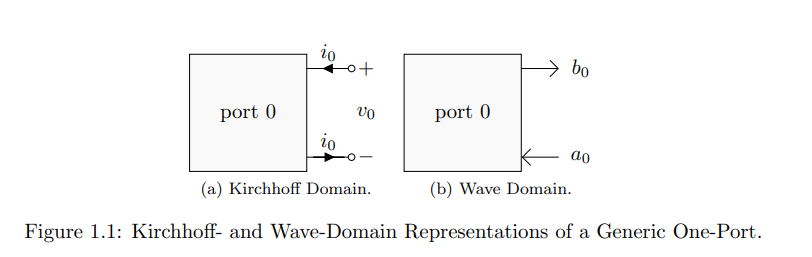

##  2. Why Transform to Wave Variables?

In Wave Digital Filters (WDFs), we don’t directly work with $(v, i)$. Instead, we define:

- $a$: **incident wave**
- $b$: **reflected wave**

This transformation is motivated by:

- Simplifying **power flow analysis**
- Enabling **modular interconnections** of components
- Ensuring **numerical stability** in discrete-time simulations
- Making **passivity conditions explicit** in algebraic terms

To define $(a, b)$, we introduce a new parameter:
- The **port resistance** $R_0$, which is not necessarily equal to a physical resistance.


##  3. Derivation: From $(v, i)$ to $(a, b)$

Let $R_0$ be a real, positive reference resistance for the port.

We define the **incident** and **reflected** wave variables:

$$
a = \frac{v + R_0 i}{2} \quad \text{(incident wave)} 
$$
$$
b = \frac{v - R_0 i}{2} \quad \text{(reflected wave)}
$$

###  Inverse transformation:

Solving for $v$ and $i$:

$$
\begin{aligned}
a + b &= v + R_0 i + v - R_0 i = 2v \\
\Rightarrow v &= a + b \\
\\
a - b &= v + R_0 i - (v - R_0 i) = 2R_0 i \\
\Rightarrow i &= \frac{a - b}{R_0}
\end{aligned}
$$

This is a **linear transformation** between $(v, i)$ and $(a, b)$, parameterized by $R_0$.


### Visualize Transformation

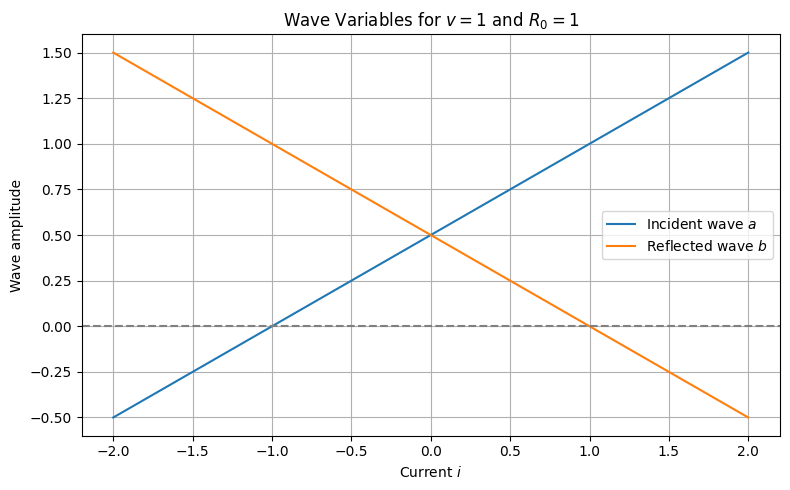

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def vi_to_ab(v, i, R):
    a = (v + R * i) / 2
    b = (v - R * i) / 2
    return a, b

# Simulation: fixed v = 1, varying i
i_vals = np.linspace(-2, 2, 200)
v_fixed = 1.0
R = 1.0

a_vals, b_vals = zip(*[vi_to_ab(v_fixed, i, R) for i in i_vals])

plt.figure(figsize=(8, 5))
plt.plot(i_vals, a_vals, label='Incident wave $a$')
plt.plot(i_vals, b_vals, label='Reflected wave $b$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Current $i$')
plt.ylabel('Wave amplitude')
plt.title('Wave Variables for $v = 1$ and $R_0 = 1$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## 4. Power and Passivity

The **instantaneous power** entering a port is:

$$
P = v \cdot i
$$

Using our wave variable definitions:

$$
P = (a + b) \cdot \frac{a - b}{R_0} = \frac{a^2 - b^2}{R_0}
$$

So we get:

$$
\boxed{P \propto a^2 - b^2}
$$

###  Interpretation:
- If $a^2 > b^2$ → the port **absorbs** energy → **passive** system.
- If $a^2 < b^2$ → the port **generates** energy → **active** or unstable.

This criterion is fundamental in WDF design.


### Visualize Power Flow

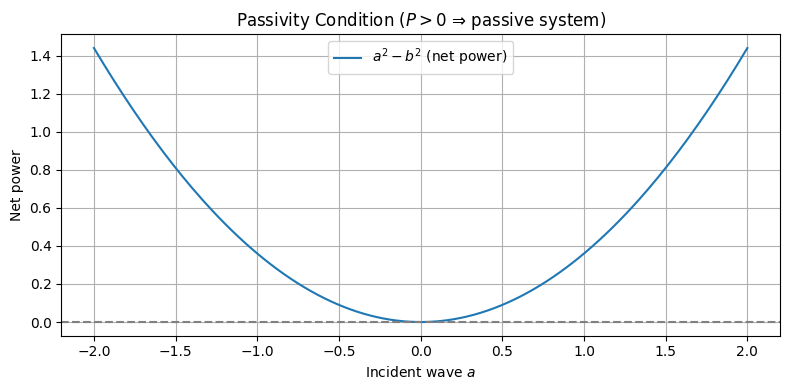

In [4]:
a = np.linspace(-2, 2, 200)
b = 0.8 * a  # passive: reflection < incidence

power = (a**2 - b**2)

plt.figure(figsize=(8, 4))
plt.plot(a, power, label=r'$a^2 - b^2$ (net power)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Incident wave $a$')
plt.ylabel('Net power')
plt.title('Passivity Condition ($P > 0$ ⇒ passive system)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Summary

In this notebook, we established the fundamental principles of WDF modeling:

- A **port** is defined by voltage and current $(v, i)$.
- These variables are transformed into **wave variables** $(a, b)$ via a linear map.
- The **power condition** $a^2 - b^2 > 0$ is central to WDF passivity.
- This formulation makes WDF components modular, passive, and stable.

In the next notebook, we will implement **algebraic one-port elements**: resistors, short circuits, and open circuits.

